# One Hot Encoding (OHE)
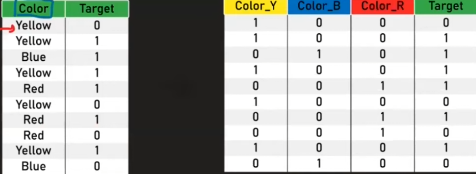

1. Converting string into vector to define the Nominal Category.    
2. In One Hot Encoding, if we have n colmuns - we keep n-1 column for optimization
3. This new n-1 columns know as Dummpy variables.
4. 

In [2]:
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_csv('cars.csv')

In [7]:
df.head()
# df['owner'].unique()
# df['brand'].value_counts()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


## 1 . One Hot Encoding using Pandas

In [8]:
pd.get_dummies(df,columns=['fuel','owner'],dtype=int).head()

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0


## 2. K-1 One Hot Encoding

In [9]:
pd.get_dummies(df,columns=['fuel','owner'],dtype=int,drop_first=True).head()

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0


## 3. One Hot Encoding using sklearn

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [11]:
X_test.head()

,brand,km_driven,fuel,owner
606,Hyundai,80000,Petrol,First Owner
7575,Mahindra,70000,Diesel,Second Owner
7705,Toyota,68089,Petrol,First Owner
4305,Hyundai,70000,Petrol,Second Owner
2685,Mahindra,97000,Diesel,Second Owner


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder()

In [28]:
ohe = OneHotEncoder(drop='first',dtype=int)
# ohe = OneHotEncoder(drop='first',spare=False) 
# -- Using spare=false - Make data into array and no need of toarray()[In the below code] 

In [29]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']]).toarray()
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [30]:
X_test_new = ohe.transform(X_test[['fuel','owner']]).toarray()
X_test.head()

,brand,km_driven,fuel,owner
606,Hyundai,80000,Petrol,First Owner
7575,Mahindra,70000,Diesel,Second Owner
7705,Toyota,68089,Petrol,First Owner
4305,Hyundai,70000,Petrol,Second Owner
2685,Mahindra,97000,Diesel,Second Owner


In [31]:
# X_train_new.shape
X_train_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

## 4. OneHotEncoding with Top categories

In [34]:
counts = df['brand'].value_counts()

In [35]:
df['brand'].nunique()

32

In [36]:
threshold = 100

In [40]:
repl = counts[counts <= threshold].index

In [42]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon'),dtype=int)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0
